**Feature Engineering** is a technique used to add variables to a plot using existing data to better explore the data. It's like creating an `age` column from a year of birth column.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

# Load Dataset

In [2]:
df = sns.load_dataset('taxis')
df.shape

(6433, 14)

In [3]:
df.head(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.6,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

# Feature Crosses

**Feature crossing** refers to combine multiple features, often numeric.

In [6]:
df.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [7]:
df['travel_time'] = (df['dropoff'] - df['pickup']).apply(lambda x: x.total_seconds())

''

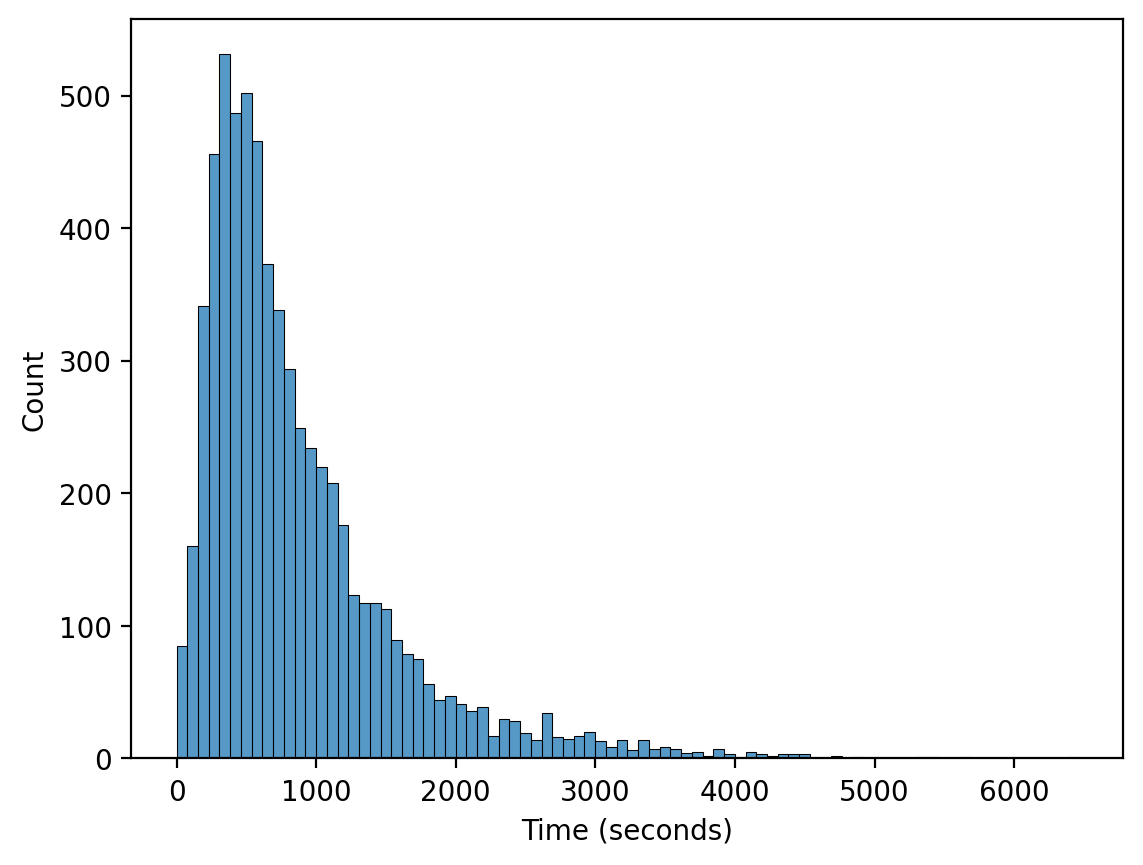

In [9]:
ax = sns.histplot(data=df, x='travel_time')
ax.set_xlabel('Time (seconds)')
;

## Seeing the travel time based on different boroughs that have trips within the same borough.

In [10]:
df['same_borough'] = (df['dropoff_borough'] == df['pickup_borough'])

''

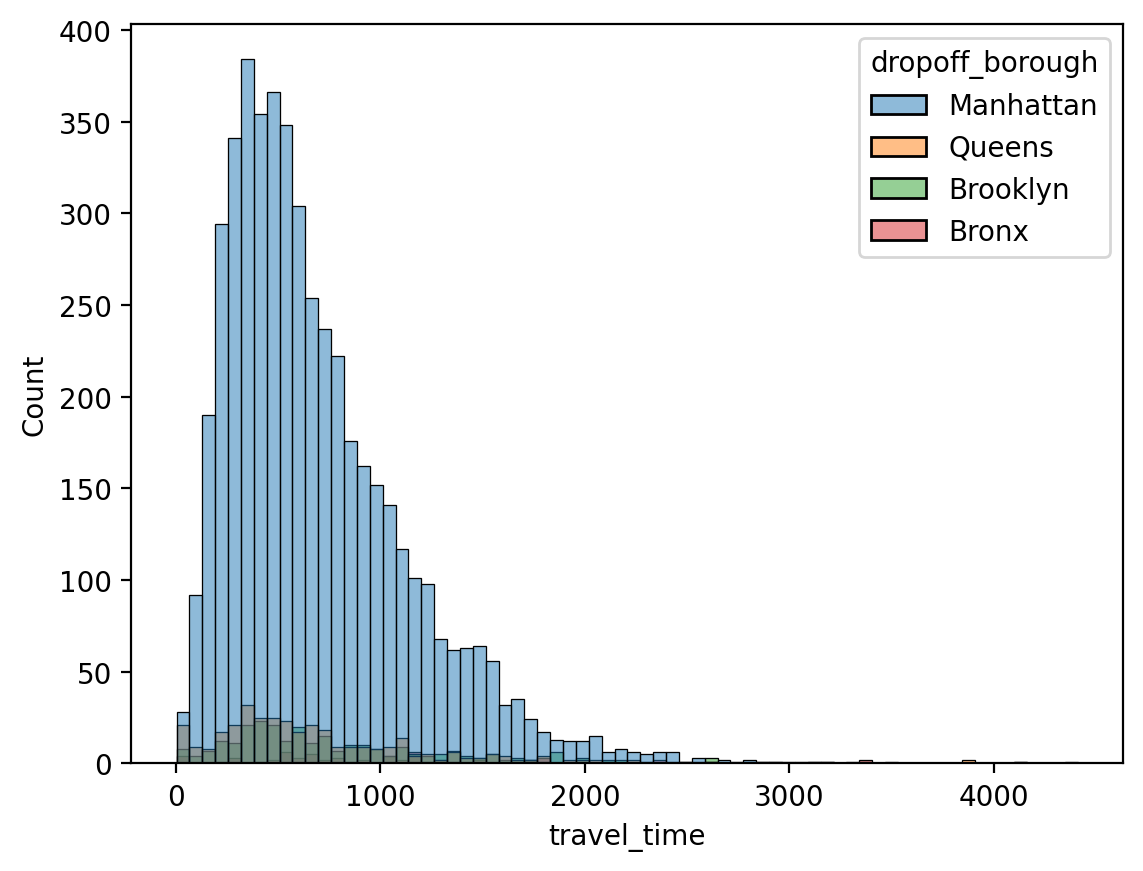

In [13]:
sns.histplot(data=df[df['same_borough'] == True], x='travel_time', hue='dropoff_borough')
;

The results are not clear so it may be best to show the travel times based on relative travel counts. This can be done by adding `stat='percent'`.

''

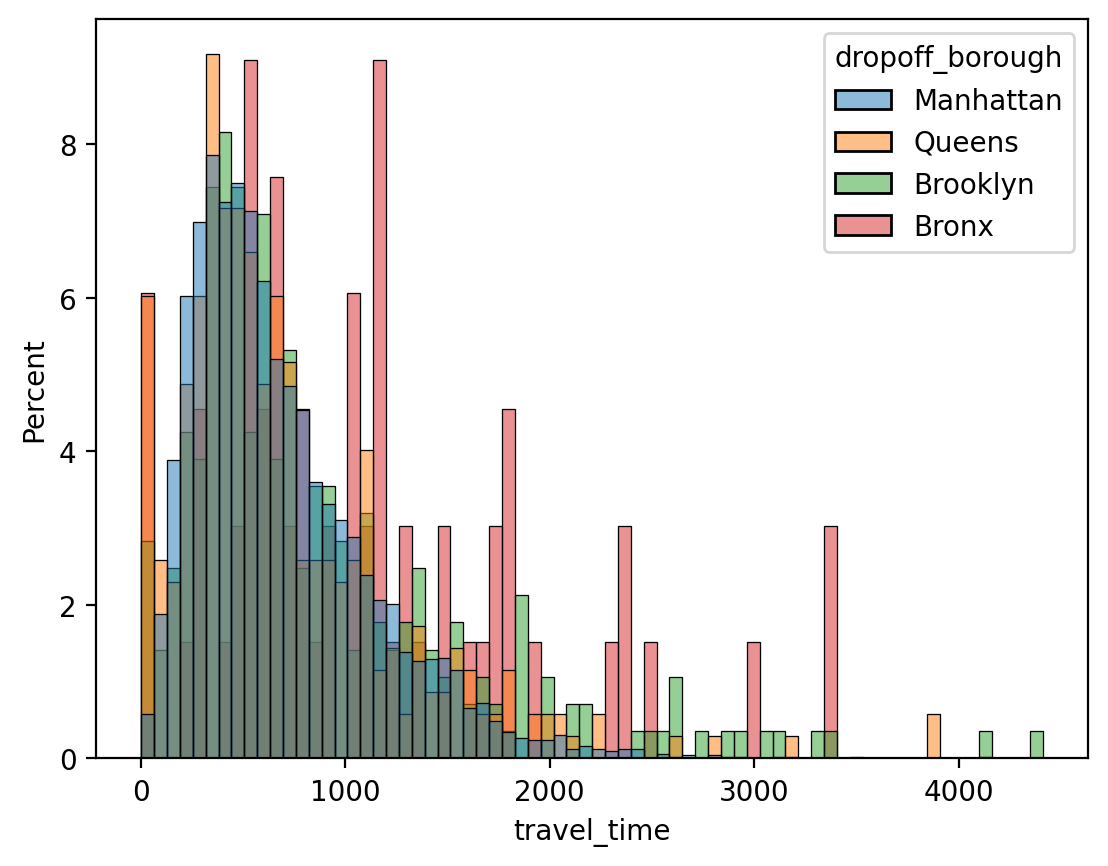

In [16]:
sns.histplot(data=df[df['same_borough'] == True], x='travel_time', hue='dropoff_borough', stat='percent', common_norm=False)
#common_norm=False is so it takes the relative values for each borough seperately rather than all of them together
;

It can be deduced that there are many outliers in the bronx region due to the lack of entries, the rest seem to have the relative same travel time per trip.

## Numerically manipulating features

An example where this can be useful is to know if rides with multiple passengers have different costs to those with a single passanger. In other words, what is the cost per passenger?

In [17]:
df['cost_per_passenger'] = (df['total'] / df['passengers'])

''

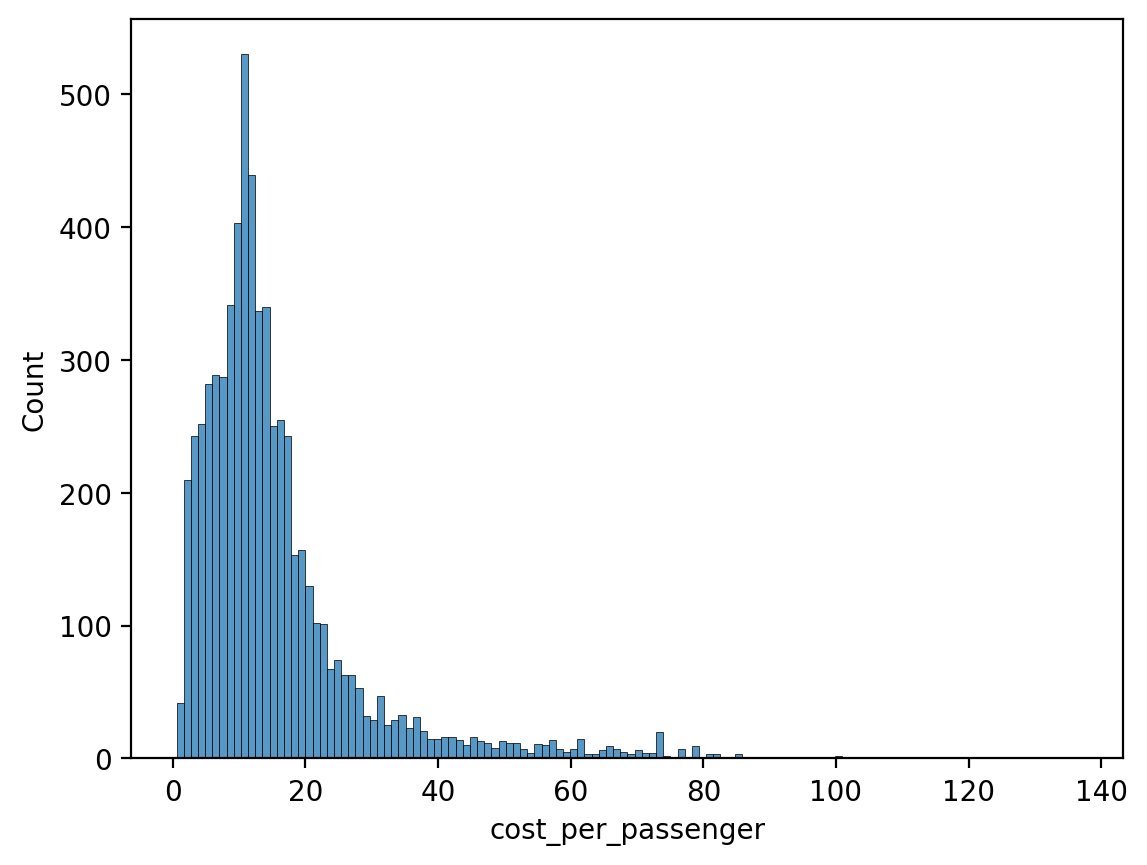

In [18]:
sns.histplot(data=df, x='cost_per_passenger')
;

It's a bit hard to deduce anything from this histogram as the cost per passenger has multiple variables from number of passengers to trip cost etc. It may be better to narrow it down to number of passengers to get the information being sought after.

In [19]:
df['trip_type'] = df['passengers'].apply(lambda x: 'solo' if x==1 else 'multi')

''

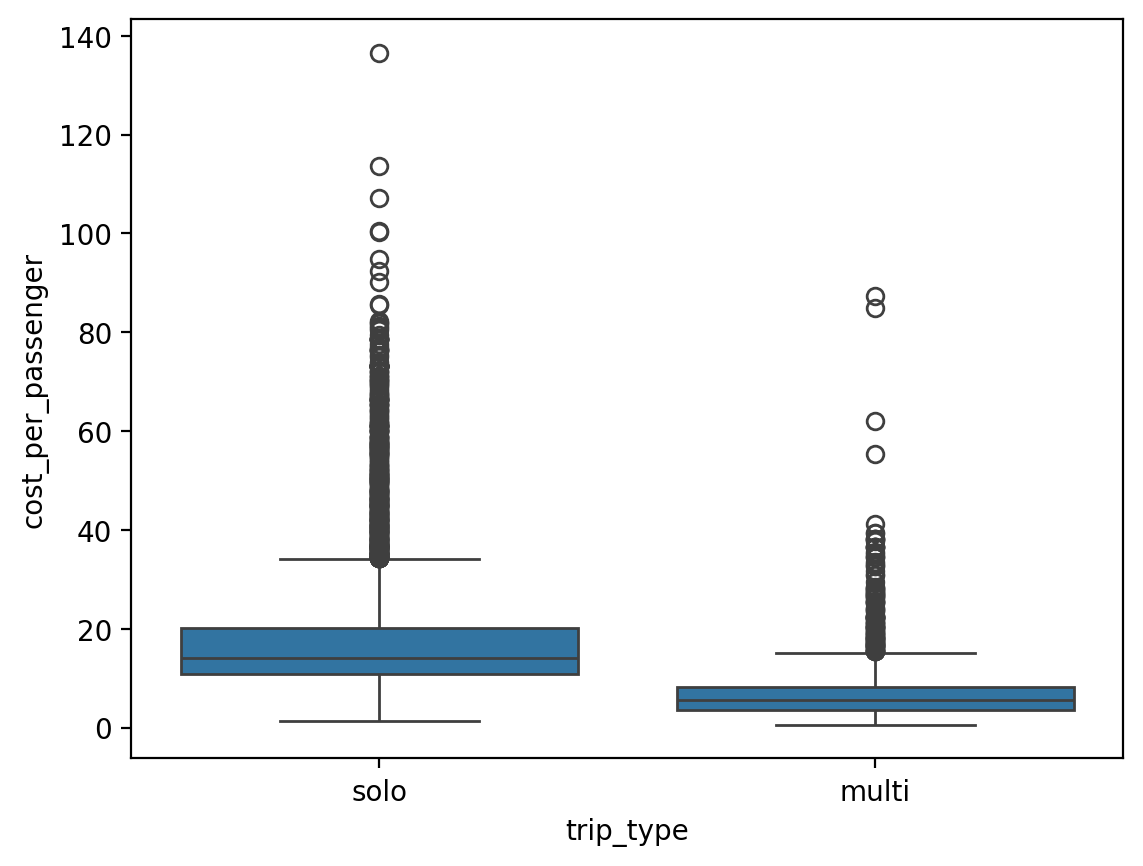

In [20]:
sns.boxplot(data=df, x='trip_type', y='cost_per_passenger')
;

Here it can be deduced taxi trips with multi passengers is usually cheaper for each passenger.

# One Hot Encoding (OHE)

One hot encoding is basically a binary representation of categorical data. It's useful for machine learning.

It can be used to convert a categorical variable to one hot encoding byb using the `pd.get_dummies()` variable. It's important to specify a column otherwise all categorical columns will be converted to one hot encoding which would add a lot of columns.

It converts a column to a number of columns based on how many possible categorical values (categories) are in that column, the more categorical values the more new columns are created

In [22]:
df.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,travel_time,same_borough,cost_per_passenger,trip_type
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,375.0,True,12.950000,solo
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,425.0,True,9.300000,solo
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,444.0,True,14.160000,solo
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1552.0,True,36.950000,solo
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,572.0,True,4.466667,multi


In [24]:
df.shape

(6433, 18)

In [25]:
pd.get_dummies(df)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,travel_time,same_borough,...,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,dropoff_borough_Bronx,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten Island,trip_type_multi,trip_type_solo
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,375.0,True,...,False,True,False,False,False,True,False,False,False,True
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,425.0,True,...,False,True,False,False,False,True,False,False,False,True
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,444.0,True,...,False,True,False,False,False,True,False,False,False,True
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,1552.0,True,...,False,True,False,False,False,True,False,False,False,True
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,572.0,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,214.0,True,...,False,True,False,False,False,True,False,False,False,True
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,3383.0,False,...,False,False,True,True,False,False,False,False,False,True
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,1147.0,True,...,True,False,False,False,True,False,False,False,False,True
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,304.0,True,...,True,False,False,False,True,False,False,False,False,True


423 columns, way too many.

In [26]:
pd.get_dummies(df, columns=['payment'])

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,travel_time,same_borough,cost_per_passenger,trip_type,payment_cash,payment_credit card
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,375.0,True,12.950000,solo,False,True
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,Upper West Side South,Upper West Side South,Manhattan,Manhattan,425.0,True,9.300000,solo,True,False
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,Alphabet City,West Village,Manhattan,Manhattan,444.0,True,14.160000,solo,False,True
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,Hudson Sq,Yorkville West,Manhattan,Manhattan,1552.0,True,36.950000,solo,False,True
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,Midtown East,Yorkville West,Manhattan,Manhattan,572.0,True,4.466667,multi,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,East Harlem North,Central Harlem North,Manhattan,Manhattan,214.0,True,6.360000,solo,False,True
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,Jamaica,East Concourse/Concourse Village,Queens,Bronx,3383.0,False,58.800000,solo,False,True
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,1147.0,True,17.300000,solo,True,False
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,304.0,True,6.800000,solo,False,True
